In [45]:
import numpy as np
import pandas as pd 
import scipy as sp
import scipy.io
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.signal import find_peaks, peak_widths

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import os
import glob
import fnmatch
import re
import argparse

import sys, getopt

In [2]:
def read_file(file_name_list):
    df_list =[]    
    _df = pd.DataFrame()

    for f in file_name_list[:20]:
        print(f)
        df_tmp = pd.read_csv(f, sep='\t', header=None) 
        #display(df_tmp.head())
        
        df_list.append(df_tmp)

    return pd.concat(df_list, axis=0)

In [3]:
#base_path = '/eos/user/s/sbordoni/SiPM_XArapucafiles/calib15june-ch2/data'
base_path = '/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data'

file_path = os.path.join(base_path,'C2*.dat')

file_name_list =  glob.glob(file_path) 
print(file_name_list)

['/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00000.dat', '/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00001.dat', '/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00002.dat', '/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00003.dat', '/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00004.dat', '/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00005.dat', '/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00006.dat', '/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00007.dat', '/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00008.dat', '/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfi

In [4]:
print('reading ' , len(file_name_list), 'files') 
df_wf_ch2 = read_file(file_name_list)
df_wf_ch2.head()

reading  1024 files
/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00000.dat
/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00001.dat
/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00002.dat
/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00003.dat
/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00004.dat
/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00005.dat
/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00006.dat
/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00007.dat
/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib15june-ch2/data/C2wf00008.dat
/eos/project/f/flic2019/Data/SiPM_XArapuca/SiPM_XArapuca_datfiles/calib

,0,1,2,3,4,5,6,7,8,9,...,99995,99996,99997,99998,99999,100000,100001,100002,100003,100004
0,e,/pro,2020/6/15 11:35:5.9504322240000,4096,4096,5120,4864,4608,4352,4096,...,4608,4864,4096,4608,5376,5376,4864,4864,4352,4352
0,e,/pro,2020/6/15 11:35:5.9830386030000,3840,4096,3840,3584,3840,3840,3840,...,3328,3840,4608,4096,4352,4096,4352,4096,3328,3584
0,e,/pro,2020/6/15 11:35:5.4700000000000,3840,4096,4096,4352,4096,4096,4096,...,3584,4096,4096,4096,3584,3840,3584,3840,3840,3840
0,e,/pro,2020/6/15 11:35:5.5030000000000,4096,3840,3840,3584,2560,3072,3840,...,4864,4096,3840,3072,3328,2816,2816,2048,2816,3328
0,e,/pro,2020/6/15 11:35:5.5350000000000,4352,4096,3584,4096,4608,4352,4352,...,3840,3840,3840,3840,3328,3584,3072,3072,2816,3328


In [5]:
df_wf_ch2.shape

(20, 100005)

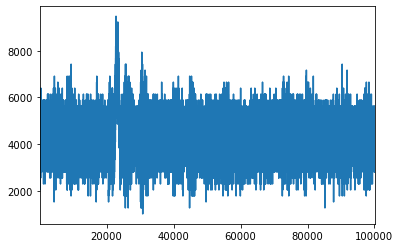

In [6]:
df_wf_ch2.iloc[1][4:].plot()

In [7]:
ped   = list(range(10, 2000))   # to estimate the pedestal
rowin = list(range(3, 100005))   # all readout window
wf    = list(range(4000, 3000))  # waveform 
tail  = list(range(50000, 100000)) # to estimate the single p.e.

def defineRoI():
    
    print('Defined Region of Interest: ' )
    print('Pedestal region (ped)  : [', min(ped)  , ',' , max(ped)  , ']'  ) 
    print('Readout window (rowin) : [', min(rowin), ',' , max(rowin), ']'  ) 
    print('Waveform (wf)          : [', min(wf)   , ',' , max(wf)   , ']'  ) 
    print('Waveform tail (tail)   : [', min(tail) , ',' , max(tail) , ']'  ) 

    return ped, rowin, wf, pe

In [8]:
def do_reindex(df):
    df = df.copy()
    df.reset_index(inplace=True, drop=True)
    return df


def convert_time(df):
    df = df.copy()
    df[2] =  pd.to_datetime(df[2], format='%Y/%m/%d %H:%M:%S.%f')
    return df

#
# Flag the saturated waveform
###
def flag_saturated(df, val=10000):
    df=df.copy()
    df['Saturated']=(df[rowin].max(axis=1) >= val)
    return df


def compute_pedestal(df):
    df=df.copy()
    df['Pedestal']=df[ped].sum(axis=1)/len(ped)
    return df

def subtract_pedestal(df):
    df = df.copy()
    df[rowin] = df[rowin].subtract(df['Pedestal'], axis=0)
    return df

def remove_noise(df):
    df=df.copy()
    df[rowin]= df[rowin].rolling(window=250,  axis=1).mean()
    return df


def has_signal_new(df):
    df = df.copy()
    
    df_sig = df.apply(lambda x: find_signal(x, wf), axis=1)    
    df = pd.concat([df, df_sig], axis =1)

    return df


def find_signal(x, myrange):
    
    x = x[min(myrange) : max(myrange)]

    peaks, properties = find_peaks(x, height=[15,2000], width=10)
    peaks = peaks+min(myrange)
    
    npeaks = len(peaks)  
    if (npeaks > 0):
        height = properties['peak_heights'][0]
        width  = properties['widths'][0]
        xlow   = int(properties['left_ips'][0])
        xhigh  = int(properties['right_ips'][0])
        area   = x[xlow :xhigh].sum() 
    else :
        height = 0
        width  = 0
        area   = 0

    return pd.Series([(npeaks>0), height, area], index=['hasSignal', 'signal height', 'signal area'])


def find_singlePE(x, myrange):

    x = x[min(myrange) : max(myrange)]
    
    #peaks, properties = find_peaks(x, height=[2000,8000], width=600, distance=4000)  # first test for calib ch2
    peaks, properties = find_peaks(x, height=[2000,6000], width=600, distance=4000, rel_heigh=1)  # first test for calib ch2
    #peaks, properties = find_peaks(x, prominence=2000, width=600, distance=4000)  # first test for calib ch2
    #widths = peak_widths(x, peaks, rel_height=1)
    
    peaks = peaks+min(myrange)
    
    npeaks = len(peaks)  
    if (npeaks > 0):
        height = properties['peak_heights'][0]
        #height = properties['prominences'][0]
        width  = properties['widths'][0]
        #width  = widths[0]
        xlow   = int(properties['left_ips'][0])
        xhigh  = int(properties['right_ips'][0])
        area   = x[xlow :xhigh].sum() 
    else :
        height = 0
        width  = 0
        area   = 0
        
    #return pd.Series([npeaks, height, width, area], index=['n pe', 'pe height', 'pe width', 'pe area'])
    return pd.Series([npeaks, height, width, area], index=['n pe', 'pe height', 'pe width', 'pe area'])




def compute_singlepe(df):
    df = df.copy()

    df_pe = df.apply(lambda x: find_singlePE(x, rowin), axis=1)    
    df = pd.concat([df, df_pe], axis =1)
    
    return df


def select_singlepe(df):
    df = df.copy()

    X_pe=df.loc[(df['Saturated'] == False ) & 
                #(df['hasSignal'] == True ) &
                (df['pe height']>0)&
                (df['pe width']>0),['pe height', 'pe width']].values

    mu_pe, cov_pe = estimate_gaus_param(X_pe,True)

    df['spe 1sig'] = df.apply(lambda x: select_wf(x[['pe height','pe width']], mu_pe, cov_pe, 1), axis=1)
    df['spe 2sig'] = df.apply(lambda x: select_wf(x[['pe height','pe width']], mu_pe, cov_pe, 2), axis=1)

    return df


def estimate_gaus_param(X, multivar=False):
    mean = np.mean(X, axis=0)
    
    if multivar:
        cov = 1/float(len(X)) * np.dot( (X - mean).T , X-mean)
    else:
        cov = np.diag(np.var(X, axis=0))
    return mean,cov


def select_wf(xy, mean, cov, n_sigma):
 
    Z = multivariate_normal.pdf( xy , mean=mean, cov=cov)
    #print(Z)
    
    sigma = np.sqrt(np.diag(cov))
    limit = n_sigma * sigma     
        
    thrsld = multivariate_normal.pdf( limit, mean=mean, cov=cov)
    #print(thrsld)
    
    return Z > thrsld

In [9]:
#
# Routine to prepare datasets: check for possible saturation and compute, subtract pedestal 
##
def prepare_dataset(_df):

    _df = _df.copy()        
    print('preparing dataframe for channel : ') 
    _df = do_reindex(_df)
    _df = convert_time(_df)
    #_df = define_channel(_df)
    #_df = do_reindex(_df)
    _df = flag_saturated(_df, 65536)
    _df = compute_pedestal(_df)
    _df = subtract_pedestal(_df)
    #_df = remove_noise(_df) 
    #_df = has_signal_new(_df)
    #_df = compute_singlepe(_df)
    #_df = select_singlepe(_df)
    #_df = tagGoodwf(_df)        

    print('done!')

    return _df


In [10]:
df_wf_ch2_proc = prepare_dataset(df_wf_ch2)

preparing dataframe for channel : 
done!


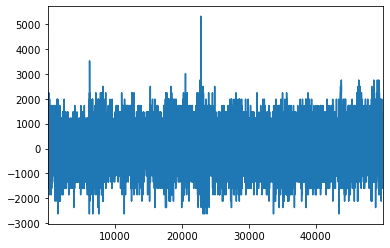

In [11]:
df_wf_ch2_proc.iloc[6][3:50000].plot() 

In [34]:
def remove_noise_loc(df):
    df=df.copy()
    df[rowin]= df[rowin].rolling(window=1000,  axis=1).mean()
    return df

df_wf_ch2_proc_noise = remove_noise_loc(df_wf_ch2_proc)

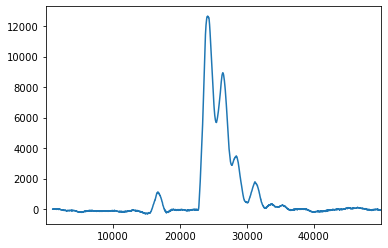

In [41]:
df_wf_ch2_proc_noise.iloc[19][3:50000].plot() 

In [69]:
def find_pe_2(df, iwf):
    
    pe_range    = list(range(500, 50000)) 
    #rowin = list(range(200, 800))
    #rowin = list(range(200,1500))
    x = df.iloc[iwf][pe_range]
    
    plt.plot(x)
    #df.iloc[iwf][rowin].plot()
    #peaks, properties = find_peaks(x, prominence=[5,20], width=20)
    #properties["prominences"], properties["widths"]
    #peaks, properties = find_peaks(x, height=[10,1000], prominence=[100,1200], width=8000, distance = 5000)
    #peaks, properties = find_peaks(x, height=[600,1200], width=100, distance=1000, prominence=[1000,1400])
    peaks, properties = find_peaks(x, height=[2000,4500], prominence=2000, width=1000, distance=4000)  # first test for calib ch2
    properties["peak_heights"], properties["widths"]
    widths, width_heights, leftwidth_ips, rightwidth_ips = peak_widths(x, peaks, rel_height=0.95)
    

    print(properties["peak_heights"])
    print(properties["widths"])
    print('full width', widths[0])
    
    #print('peak x position', x[peaks])
        
    
    peaks = peaks+min(pe_range)
    #print('here' , peaks)
    #peaks
    plt.plot(peaks, x[peaks], "x")
  
    plt.vlines(x=peaks, ymin=x[peaks] - properties["peak_heights"],
               ymax = x[peaks], color = "C1")
    plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"]+min(pe_range),
               xmax=properties["right_ips"]+min(pe_range), color = "C1")
    plt.hlines(y=width_heights[0], xmin=leftwidth_ips+min(pe_range),
               xmax=rightwidth_ips+min(pe_range), color = "C3")
    
    plt.xlabel('time ticks')
    plt.ylabel('ADC counts')
    
    
    plt.show()
    
    
    return peaks, properties

[3081.58777889]
[1193.13888889]
full width 2815.75


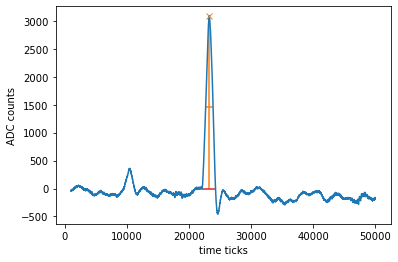

In [75]:
peaks, properties = find_pe_2(df_wf_ch2_proc_noise, 9)

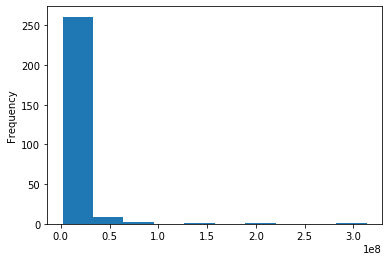

In [16]:
df_wf_ch2_proc.loc[(df_wf_ch2_proc['pe height']>0)]['pe area'].plot(kind='hist')

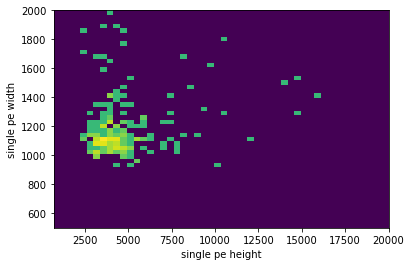

In [18]:
plt.hist2d(df_wf_ch2_proc['pe height'], df_wf_ch2_proc['pe width'], 
           [50,50], range=[[700,20000],[500,2000]],
           cmap='viridis',
           norm=mcolors.PowerNorm(0.18))
plt.xlabel('single pe height')
plt.ylabel('single pe width')

plt.show()

In [19]:
df_wf_ch2_proc.head()

,0,1,2,3,4,5,6,7,8,9,...,100003,100004,Saturated,Pedestal,n pe,pe height,pe width,pe area,spe 1sig,spe 2sig
0,e,/pro,2020-06-15 11:35:05.950432224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4352,4352,False,4304.787940,0.0,0.000,0.000000,0.000000e+00,False,False
1,e,/pro,2020-06-15 11:35:05.983038603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3328,3584,False,4422.239196,1.0,3735.552,1071.583333,2.827751e+06,True,True
2,e,/pro,2020-06-15 11:35:05.470000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3840,3840,False,4216.667337,1.0,4625.408,1082.586538,3.705332e+06,True,True
3,e,/pro,2020-06-15 11:35:05.503000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2816,3328,False,4184.120603,1.0,3371.008,1136.708333,2.698525e+06,True,True
4,e,/pro,2020-06-15 11:35:05.535000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2816,3328,False,4076.446231,1.0,3910.656,1097.196429,3.054529e+06,True,True


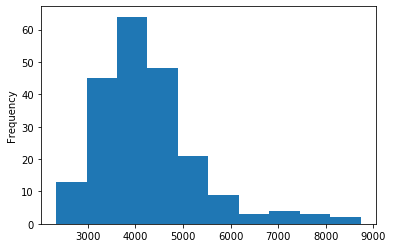

In [21]:
df_wf_ch2_proc.loc[(df_wf_ch2_proc['spe 1sig']==True)]['pe height'].plot(kind='hist')

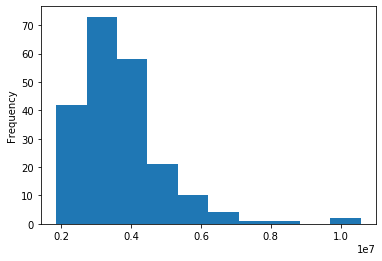

In [22]:
df_wf_ch2_proc.loc[(df_wf_ch2_proc['spe 1sig']==True)]['pe area'].plot(kind='hist')

In [23]:
df_wf_ch2_proc.to_csv("calib15june-ch2_0-300files_prominence2000.csv")